# Handwritten Digit Recognition System

### 1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### 2. Load and Preprocess Data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


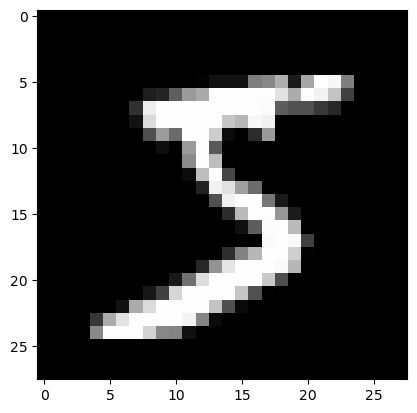

In [2]:
# Load the MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize the data (Convert pixel values to float and normalize between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data to add an extra dimension for channels (grayscale image has 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Display a sample digit
plt.imshow(X_train[0], cmap='gray')
plt.show()

### 3. Build CNN Model

In [3]:
# Build the CNN model for handwritten digit recognition
cnn = models.Sequential([

    # First convolutional layer (32 filters of size 3x3)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer (64 filters of size 3x3)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer (64 filters)
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output from the conv layers
    layers.Flatten(),

    # Fully connected layer (Dense layer)
    layers.Dense(64, activation='relu'),

    # Output layer (10 output units for 10 digit classes)
    layers.Dense(10, activation='softmax')
])

# Print the model summary to understand the architecture
cnn.summary()

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Compile and Train the Model


In [4]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model on the training set
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 23ms/step - accuracy: 0.9009 - loss: 0.3232 - val_accuracy: 0.9860 - val_loss: 0.0418
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9844 - loss: 0.0491 - val_accuracy: 0.9886 - val_loss: 0.0345
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9912 - val_loss: 0.0276
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9902 - val_loss: 0.0319
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9888 - val_loss: 0.0377
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9896 - val_loss: 0.0381
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 0.9879 - val_loss: 0.0437
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9965 -

### 5. Evaluate Model Performance

In [5]:
# Evaluate the model on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9897 - loss: 0.0514
Test Accuracy: 0.991100013256073


### 6. Plot Accuracy and Loss Over Epochs

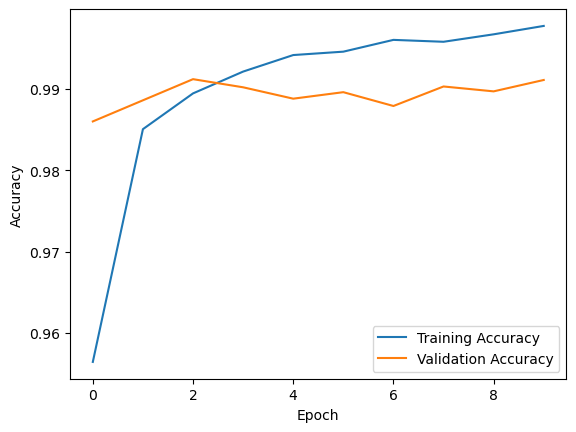

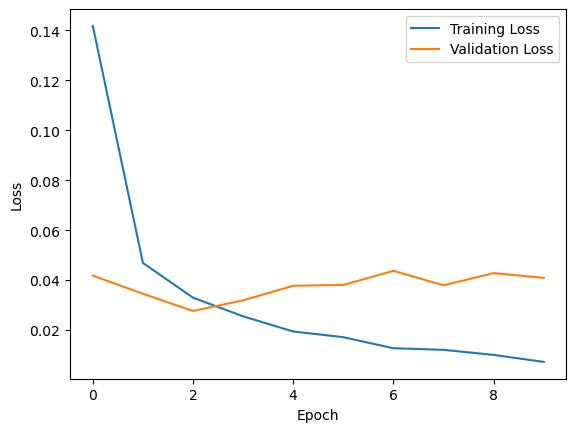

In [6]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### 7. Make Predictions

In [7]:
# Make predictions on the test set
y_pred = cnn.predict(X_test)

# Convert predictions to class labels
y_pred_classes = [np.argmax(element) for element in y_pred]

# Display the first 5 predictions and their true labels
print("Predicted classes:", y_pred_classes[:5])
print("True classes:", y_test[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted classes: [7, 2, 1, 0, 4]
True classes: [7 2 1 0 4]


### 8. Test the Model on Custom Handwritten Digit Image 

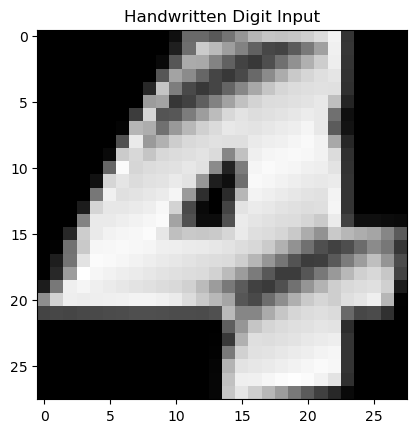

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted digit: 4


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Load the image from your local directory
img_path = ''  # Replace with the path to your image
img = Image.open(r'C:\Users\ASUS\Downloads\images.jpeg').convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (size expected by the model)
img = img.resize((28, 28))

# Invert the image (depends on the background color)
img = np.invert(img)

# Normalize the image (convert pixel values to 0-1)
img = img / 255.0

# Reshape the image to match the input shape of the model (1, 28, 28, 1)
img = img.reshape(1, 28, 28, 1)

# Show the image that is being predicted
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Handwritten Digit Input")
plt.show()

# Use the trained model to make a prediction
prediction = cnn.predict(img)

# Print the predicted class
predicted_digit = np.argmax(prediction)
print(f"Predicted digit: {predicted_digit}")